<div align="center">
    <h1><strong>Transferencia de Calor 2D</strong></h1>
    <h2>Juan David Argüello Plata</h2>
    <img src="Images/uis.png" style="width: 300px;" />
</div>

## __LÉEME__

<div align="justify">
    Antes de iniciar a leer y analizar el presente trabajo, ten en cuenta que debes <strong>esperar</strong> a que termine de cargar la página web.
</div>

<div align="center">
    <img src="Images/binder.PNG" style="width: 450px;" />
</div>
<div align="center">
    <i>Figura 0.</i> Página inicial <i>binder</i>.
</div>

<div align="justify">
    Una vez <i>desaparezca</i> la página de carga (Figura 0), recuerda que los bloques de código los puedes ejecutar con el siguiente comando:
</div>

``
CTRL + ENTER
``

## __1. Planteamiento del Problema__

<div align="justify">
    Se busca analizar, mediante métodos <i>analíticos</i> y <i>numéricos</i>, la transferencia de calor de la barra mostrada en la Figura 1.
</div>

<br>

<div align="center">
    <img src="Images/Esquema_3D/Esquema.PNG" style="width: 500px;" />
</div>

<div align="center">
    <i>Figura 1.</i> Geometría del problema.
</div>

<div align="justify">
    Se toman las siguientes suposiciones:
</div>

* Conductividad térmica constante.
* Conducción 2D.
* Generación de calor por unidad de volumen constante.
* Conducción estable (no transitoria).

<div align="justify">
    Los datos del problema se pueden especificar a continuación.
</div>

In [1]:
data = {
    'Geometría': {
        'W': {
            'Valor':10,
            'Units': 'm'
        },
        'H': {
            'Valor': 10,
            'Units': 'm'
        },
        'E': {
            'Valor': 1,
            'Units': 'm'
        }
    },
    'Propiedades': {
        'T_0': {
            'Valor': 100+273,
            'Units': 'K'
        },
        'T_{infty}': {
            'Valor': 0+273,
            'Units': 'K'
        },
        'K': {
            'Valor': 55,
            'Units': 'W/m \, K'
        },
        'h': {
            'Valor': 10,
            'Units': 'W/m^2 \, °C'
        },
        'Q_g': {
            'Valor': 100,
            'Units': 'W/m^3'
        }
    }
}

from IPython.display import HTML, display
for c in data:
    for d in data[c]: 
        text = '$' + d + '= ' + str(data[c][d]['Valor']) + '' + data[c][d]['Units'] + '$'
        display(HTML(text))

## __2. Solución Analítica__

<div align="justify">
    Se desarrolla el análisis sobre lo mostrado en la Figura 2.
</div>

<div align="center">
    <img src="Images/Esquema/Esquema.png" style="width: 600px;" />
</div>

<div align="center">
    <i>Figura 2.</i> Problema de estudio con condiciones de frontera.
</div>

<div align="justify">
    De la Figura 2, $\theta$ es la temperatura adimensional y $Bi$ es el número de Biot.
    $$
    \begin{equation}
        \theta (x^*,y^*) \equiv \frac{T(x,y) - T_{\infty}}{T_0 - T_{\infty}}
        \tag{1}
        \label{teta}
    \end{equation}
    $$
    El número de Biot se puede apreciar en la Ecuación \ref{Biot}.
    $$
    \begin{equation}
        Bi = \frac{h W}{K}
        \tag{2}
        \label{Biot}
    \end{equation}
    $$
    El análisis se desarrollará con variables adimensionales. 
    $$
    \begin{equation}
        H ^* \equiv  \frac{H}{W} \\
        x ^* \equiv \frac{x}{W} \\
        y ^* \equiv \frac{y}{H}
    \end{equation}
    $$
</div>

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.4 (Python 3.7.4-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [ ]:
#Constantes adimensionales
H = data['Geometría']['H']['Valor']/data['Geometría']['W']['Valor']
Bi = data['Geometría']['W']['Valor']*\
data['Propiedades']['h']['Valor']/data['Propiedades']['K']['Valor']
theta_0 = (data['Propiedades']['T_0']['Valor'] - \
           data['Propiedades']['T_{infty}']['Valor'])/\
(data['Propiedades']['T_0']['Valor'] - \
           data['Propiedades']['T_{infty}']['Valor'])

#Planteamiento de la ecuación diferencial
#thetaX, thetaY = map(Function, 'XY')
theta = Function('\\theta')
Ec = Eq(theta(x,y).diff(x,2) + theta(x,y).diff(y,2),0)
Ec

In [ ]:
#Condiciones de frontera
bc = {
    theta(x,0):theta_0,
    theta(x,y).diff(x).subs(x,0): 0,
    theta(x,y).diff(y).subs(y,1): 0,
    theta(x,y).diff(x).subs(x,1): -Bi*theta(x,y).subs(x,1)
}
"""
sol = pdsolve(Ec, theta(x,y))
sol
"""
bc

## __3. Solución Numérica__

<div align="justify">
    La geomtería dada es la siguiente:
</div>

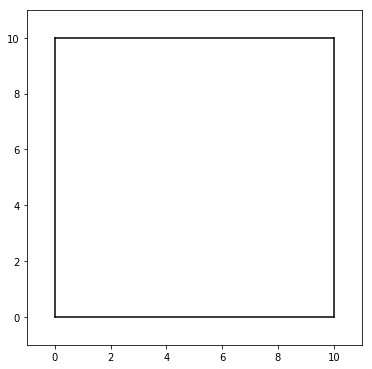

In [17]:
%matplotlib inline
from App.Preprocessing.Geometry import *
Geo(data['Geometría'], True)

### 3.1. Mallado

<div align="justify">
    Se inicia realizando la discretización del dominio.
</div>

In [3]:
%matplotlib inline
from App.Preprocessing.Mesh import Malla
import sqlite3 as sql
from ipywidgets import *
def Mesh(xsub,ysub, numN = False):
    Malla((data['Geometría']['W']['Valor']/xsub,
           data['Geometría']['H']['Valor']/ysub),
           (data['Propiedades']['T_0']['Valor'],
            data['Propiedades']['T_{infty}']['Valor']),
           False,
           (numN, False),
           data['Geometría'])
    #Conexión con base de datos
    con = sql.connect('App/data.db')
    text = ["SELECT * FROM ", " ORDER BY ", " DESC LIMIT 1"]
    n =  con.execute(text[0]+' nodes '+text[1]+' NodeID '+text[2]).fetchall()
    el = con.execute(text[0]+' elements '+text[1]+' ElID '+text[2]).fetchall()
    con.close()
    display(HTML("Número de nodos: " + str(n[0][0])))
    display(HTML("Número de elementos: " + str(el[0][0])))
    return data['Geometría']['W']['Valor']/xsub, data['Geometría']['H']['Valor']/ysub
ElData = interactive(Mesh,
                     xsub=(3,10,1),
                     ysub=(3,10,1),
                     numN = False, 
                     continous_update=False)
display(ElData)

interactive(children=(IntSlider(value=6, description='xsub', max=10, min=3), IntSlider(value=6, description='y…

### __3.2. SOLVER__

<div align="justify">
    El planteamiento matricial se desarrolla con base en las siguietes relaciones matemáticas:
    $$
    \begin{equation}
        a_p T_p = a_E T_E + a_W T_W + a_N T_N + a_S T_S + Q_g \Delta x \Delta y
        \tag{3}
        \label{Ts}
    \end{equation}
    $$
    Dónde $b$ es la generación de calor y: 
    $$
    \begin{equation}
        a_p = a_E + a_W + a_N + a_S \\
        a_E = K \frac{\Delta y}{\delta x} \\
        a_W = K \frac{\Delta y}{\delta x} \\
        a_N = K \frac{\Delta x}{\delta y} \\
        a_S = K \frac{\Delta x}{\delta y}
    \end{equation}
    $$
    Para la malla mostrada anteriormente, el sistema de ecuaciones general es el siguiente:
</div>

In [4]:
#Lectura de la base de datos
con = sql.connect('App/data.db')
nodos = con.execute("SELECT * FROM nodes ORDER BY ID ASC").fetchall()
elementos = con.execute("SELECT * FROM elements ORDER BY p ASC").fetchall()
con.close()
#Símbolos
Ts = symbols("T_1:" + str(len(nodos)+1))
a_p, a_E, a_W, a_S, a_N, Q_g = symbols("a_p, a_E, a_W, a_S, a_N, Q_g")
Dx, Dy, dx, dy = Symbol("\\Delta  x"), Symbol("\\Delta  y"), Symbol("\\delta  x"), Symbol("\\delta  y")
#Planteamiento de ecuaciones y suposiciones
Ecuaciones = []
sol = {}
conocidas = {}
suma = 0
for i in range(len(nodos)):
    if nodos[i][-1] is None:
        Ec = Eq(a_p*Ts[elementos[suma][3]-1],a_E*Ts[elementos[suma][4]-1]+\
                a_W*Ts[elementos[suma][5]-1]+a_N*Ts[elementos[suma][1]-1]+\
                a_S*Ts[elementos[suma][2]-1]+Q_g*Dx*Dy)
        sol[Ts[elementos[suma][3]-1]] = solve(Ec, Ts[elementos[suma][3]-1])[0]
        suma += 1
    else:
        Ec = Eq(Ts[i], nodos[i][-1])
        conocidas[Ts[i]] = solve(Ec)[0]
    Ecuaciones.append(Ec)
sup = {}
for el in elementos:
    sup[Ts[el[3]-1]] = 0
Ecuaciones

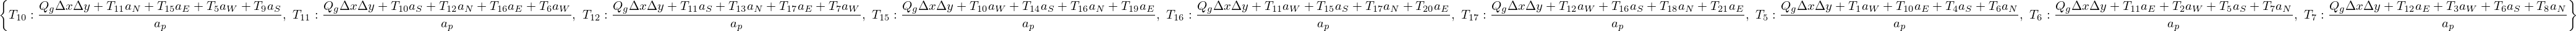

In [5]:
sol

#### 3.2.1. Solución mediante _Gauss - Seidel_

<div align="justify">
    <i> Gauss - Seidel</i> plantea una metodología de solución y comprobación iterativa. Se parte de la solución "trivial" como punto de partida.
</div>

In [6]:
sup

Reemplazando los datos correspondientes, se obtiene...

In [7]:
#Variables
var = {}
var['Q_g'], var['K'] = data['Propiedades']['Q_g']['Valor'], data['Propiedades']['K']['Valor']
var['Dx'], var['Dy'] = ElData.result
#a's
for a in ['a_E', 'a_W']:
    var[a] = var['K']*(var['Dy']/var['Dx'])
for a in ['a_S', 'a_N']:
    var[a] = var['K']*(var['Dx']/var['Dy'])
var['a_p'] = 0    #Es 0 porque es conducción pura, rho*u (densidad por velocidad)
for a in ['a_E', 'a_W', 'a_S', 'a_N']:
    var['a_p'] += var[a]
#Diccionario de variables
var_sup = {}
for key in [Q_g, a_E, a_W, a_S, a_N, a_p]:
    var_sup[key] = var[f"{key}"]
var_sup[Dx], var_sup[Dy] = var['Dx'], var['Dy']
#Reemplazar
solution = {}
protected = frozenset(sol.items())
for s in sol:
    solution[s] = dict(protected)[s].subs(var_sup)
    solution[s] = solution[s].subs(conocidas)
solution

Ahora, se desarrolla el procedimiento iterativo. Se plantea un criterio de convergencia que defina la _culminación_ del proceso de cálculo.

In [8]:
from IPython.display import HTML, display
con.close()
#----Criterio de convergencia----
CC = 0.05
max_it = 10    #Número máximo de iteraciones

#--Solución mediante Gauss - Seidel--
criterion = 1.1
it = 0
protected = frozenset(solution.items())
protected_sup = frozenset(sup.items())
while True:
    if criterion <= CC or it >= max_it:
        display(HTML("Iteración número $" + str(it) + "$. Máximo valor de error: $" \
                     + str(round(criterion*100,2)) + "\%$"))
        break
    it += 1
    if it == 1:
        viejo = dict(protected_sup)
    #Reemplaza con valores anteriores
    nuevo = {}
    maximo = -1
    T_max = data['Propiedades']['T_{infty}']['Valor']
    for key in sol:
        nuevo[key] = dict(protected)[key].subs(viejo)
        porcentaje = abs((nuevo[key]-viejo[key])/nuevo[key])
        viejo[key] = nuevo[key]
        if T_max < nuevo[key]:
            T_max = nuevo[key]
        if maximo < porcentaje:
            maximo = porcentaje
    criterion = maximo
Temps = {**nuevo, **conocidas}
#Actualización de la base de datos nodales
con = sql.connect('App/data.db')
for i in range(len(nodos)):
    if nodos[i][4] is None:
        con.execute("UPDATE nodes SET T =" + str(Temps[Ts[i]]) + " WHERE ID =" + str(i+1))
nodos = con.execute("SELECT * FROM nodes ORDER BY ID ASC").fetchall()
con.close()
Temps

In [ ]:
nodos

### __3.3. Postprocesamiento__

<div align="justify">
    La distribución de temperatura se puede apreciar a continuación.
</div>

array([ 0.        ,  0.        ,  0.        ,  1.66666667,  1.66666667,
        1.66666667,  1.66666667,  1.66666667,  5.        ,  5.        ,
        5.        ,  5.        ,  5.        ,  8.33333333,  8.33333333,
        8.33333333,  8.33333333,  8.33333333, 10.        , 10.        ,
       10.        ])

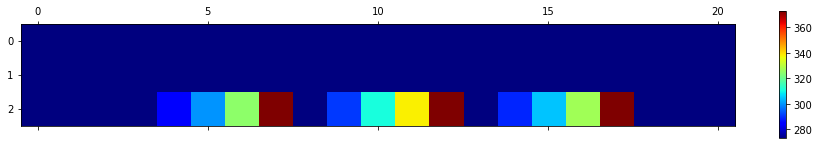

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X, Y, T = [], [], []
for nodo in nodos:
    X.append(nodo[2])
    Y.append(nodo[3])
    T.append(nodo[4])
plt.matshow([np.array(X),np.array(Y), np.array(T)], cmap=plt.cm.get_cmap('jet'), 
                vmin=data['Propiedades']['T_{infty}']['Valor'], vmax=data['Propiedades']['T_0']['Valor'])
plt.colorbar()
np.array(X)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X, Y, T = [], [], [[] for i in range(len(nodos))]
for nodo in nodos:
    X.append(nodo[2])
    Y.append(nodo[3])
    for i in range(len(T)):
        T[i].append(nodo[4])
X, Y = np.meshgrid(X, Y,)
fig, ax = plt.subplots(1,1)
ax.pcolormesh(X,Y,np.array(T), cmap='RdBu')


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=[0, 0, data['Geometría']['W']['Valor'], data['Geometría']['W']['Valor'], 0, 0, data['Geometría']['W']['Valor'], data['Geometría']['W']['Valor']],
        y=[0, data['Geometría']['H']['Valor'], data['Geometría']['H']['Valor'], 0, 0, data['Geometría']['H']['Valor'], data['Geometría']['H']['Valor'], 0],
        z=[0, 0, 0, 0,0,0,0,0],
        colorbar_title='z',
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity = np.linspace(0, 1, 9, endpoint=True),
        # i, j and k give the vertices of triangles
        i = [3],
        j = [2],
        k = [0],
        name='y',
        showscale=True
    )
])
fig.show()

In [ ]:
#Inicialización de la matriz
M = []
for i in range(len(nodos)):
    vec = []
    for j in range(len(nodos)):
        vec.append(0)
    M.append(vec)
for i in range(len(nodos)):
    M[i][i] = solve(Ecuaciones[i], Ts[i])[0]
SM = Matrix(M)
SM

Con la matriz simbólica podemos calcular los eigenvalores y eigenvectores.

In [ ]:
#SM.eigenvals()

In [ ]:
ElData.result

In [ ]:
ec = Eq(2*Ts[0] + Ts[1], 5*Ts[4])
sol = solve(ec, Ts[1])
sol